In [2]:
import pandas as pd
import numpy as np
import csv
import torch
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import matplotlib.animation as animation
import operator

In [3]:
with open('origin.csv') as f:
    df_origin = pd.read_csv(f)
df_origin.head(20)

,(K/u)_L,(K/u)_M,Jm_L,Jm_M,u_L/u_M(Shear contrast),volume contrast,critical strain,wavenumber
0,0.1,0.1,0.01,0.01,100,0.04,0.083969,1.78
1,0.2,0.2,0.01,0.01,100,0.04,0.082373,1.83
2,0.3,0.3,0.01,0.01,100,0.04,0.081879,1.84
3,0.5,0.5,0.01,0.01,100,0.04,0.081496,1.85
4,0.8,0.8,0.01,0.01,100,0.04,0.081285,1.86
5,1.0,1.0,0.01,0.01,100,0.04,0.081215,1.86
6,2.0,2.0,0.01,0.01,100,0.04,0.081077,1.87
7,5.0,5.0,0.01,0.01,100,0.04,0.080995,1.87
8,8.0,8.0,0.01,0.01,100,0.04,0.080974,1.87
9,10.0,10.0,0.01,0.01,100,0.04,0.080967,1.87


In [4]:
with open('processed.csv') as f:
    df_processed = pd.read_csv(f)
df_processed.head(20)

,(K/u)_L,(K/u)_M,Jm_L,Jm_M,u_L/u_M(Shear contrast),volume contrast,critical strain,wavenumber
0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.234182,0.977052
1,0.075257,0.075257,0.0,0.0,1.0,0.0,0.229731,0.979818
2,0.119280,0.119280,0.0,0.0,1.0,0.0,0.228355,0.980362
3,0.174743,0.174743,0.0,0.0,1.0,0.0,0.227286,0.980903
4,0.225772,0.225772,0.0,0.0,1.0,0.0,0.226697,0.981441
5,0.250000,0.250000,0.0,0.0,1.0,0.0,0.226503,0.981441
6,0.325257,0.325257,0.0,0.0,1.0,0.0,0.226118,0.981977
7,0.424743,0.424743,0.0,0.0,1.0,0.0,0.225888,0.981977
8,0.475772,0.475772,0.0,0.0,1.0,0.0,0.225831,0.981977
9,0.500000,0.500000,0.0,0.0,1.0,0.0,0.225811,0.981977


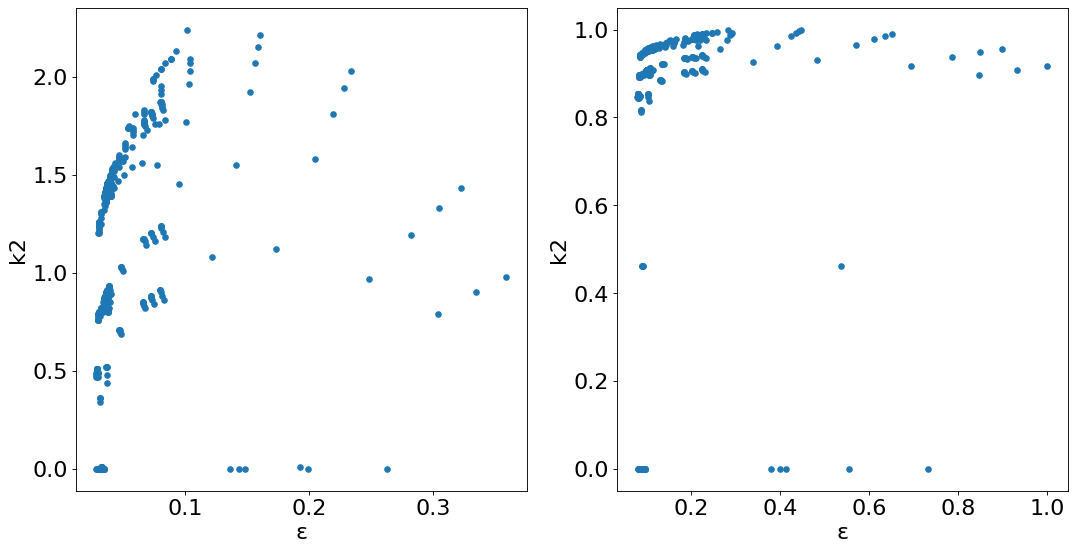

In [5]:
plt.figure(figsize=(16,8), dpi=80)
ax1 = plt.subplot(121)
ax1.set_ylabel('k2', fontsize=20)
ax1.set_xlabel('ε', fontsize=20)
plt.tick_params(labelsize=20)
ax1.scatter(df_origin.iloc[:,6], df_origin.iloc[:,7], s = 24)

ax2 = plt.subplot(122)
ax2.set_ylabel('k2', fontsize=20)
ax2.set_xlabel('ε', fontsize=20)
plt.tick_params(labelsize=20)
ax2.scatter(df_processed.iloc[:,6], df_processed.iloc[:,7], s = 24)

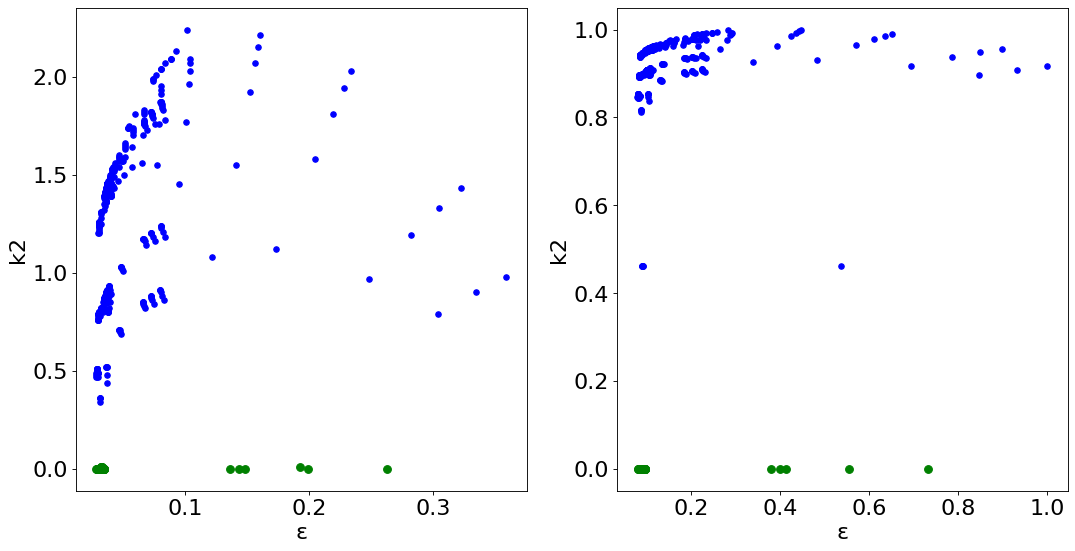

In [6]:
plt.figure(figsize=(16,8), dpi=80)
ax1 = plt.subplot(121)
ax1.set_ylabel('k2', fontsize=20)
ax1.set_xlabel('ε', fontsize=20)
plt.tick_params(labelsize=20)
df_origin_macro = df_origin[df_origin['wavenumber'] <= 2e-2]
df_origin_micro = df_origin[df_origin['wavenumber'] > 2e-2]
ax1.scatter(df_origin_macro.iloc[:,6], df_origin_macro.iloc[:,7], s = 48, c = 'g')
ax1.scatter(df_origin_micro.iloc[:,6], df_origin_micro.iloc[:,7], s = 24, c = 'b')

ax2 = plt.subplot(122)
ax2.set_ylabel('k2', fontsize=20)
ax2.set_xlabel('ε', fontsize=20)
plt.tick_params(labelsize=20)
df_processed_macro = df_processed[df_processed['wavenumber'] == 0]
df_processed_micro = df_processed[df_processed['wavenumber'] != 0]
ax2.scatter(df_processed_macro.iloc[:,6], df_processed_macro.iloc[:,7], s = 48, c = 'g')
ax2.scatter(df_processed_micro.iloc[:,6], df_processed_micro.iloc[:,7], s = 24, c = 'b')

In [7]:
p = df_origin[df_origin['wavenumber'] >= 1e-3]
p = p[p['wavenumber'] <= 2e-2]
p

,(K/u)_L,(K/u)_M,Jm_L,Jm_M,u_L/u_M(Shear contrast),volume contrast,critical strain,wavenumber
252,0.1,0.1,30.0,30.0,100,0.08,0.033031,0.0101
253,0.2,0.2,30.0,30.0,100,0.08,0.033008,0.0101
261,10.0,10.0,90.0,90.0,100,0.08,0.032288,0.0101
262,100.0,100.0,90.0,90.0,100,0.08,0.032288,0.0101
263,1000.0,1000.0,90.0,90.0,100,0.08,0.032288,0.0101
583,0.2,1000.0,1000.0,1000.0,2,0.04,0.192686,0.0101


In [8]:
class ANN_L1(torch.nn.Module):
    # Net类的初始化函数
    def __init__(self, n_feature, n_hidden, n_output):
        # 继承父类的初始化函数
        super(ANN_L1, self).__init__()
        # 网络的隐藏层创建，名称可以随便起
        self.hidden_layer = torch.nn.Linear(n_feature, n_hidden)
        # 输出层(预测层)创建，接收来自隐含层的数据
        self.predict_layer = torch.nn.Linear(n_hidden, n_output)

    # 网络的前向传播函数，构造计算图
    def forward(self, x):
        # 用relu函数处理隐含层输出的结果并传给输出层
        hidden_result = self.hidden_layer(x)
        relu_result = F.relu(hidden_result)
        predict_result = self.predict_layer(relu_result)
        return predict_result

In [9]:
class ANN_L2(torch.nn.Module):
    # Net class initialization method
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        # succeed initialization method from father class
        super(ANN_L1, self).__init__()
        # build the first hidden layer
        self.hidden_layer1 = torch.nn.Linear(n_feature, n_hidden1)
        # build the second hidden layer
        self.hidden_layer2 = torch.nn.Linear(n_hidden1, n_hidden2)
        # output layer, receive hidden layer signals
        self.predict_layer = torch.nn.Linear(n_hidden2, n_output)

    # forward propagation
    def forward(self, x):
        # relu函数处理隐含层输出的结果并传给输出层
        hidden_result1 = self.hidden_layer1(x)
        relu_result1 = F.relu(hidden_result1)
        hidden_result2 = self.hidden_layer2(relu_result1)
        relu_result2 = F.relu(hidden_result2)
        predict_result = self.predict_layer(relu_result2)
        return predict_result

In [10]:
class ANN_L3(torch.nn.Module):
    # Net class initialization method
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_hidden3, n_output):
        super(ANN_L1, self).__init__()
        self.hidden_layer1 = torch.nn.Linear(n_feature, n_hidden1)# first hidden layer
        self.hidden_layer2 = torch.nn.Linear(n_hidden1, n_hidden2)# second hidden layer
        self.hidden_layer3 = torch.nn.Linear(n_hidden2, n_hidden3)# third hidden layer
        self.predict_layer = torch.nn.Linear(n_hidden3, n_output)# output layer

    # forward propagation
    def forward(self, x):
        # 用relu函数处理隐含层输出的结果并传给输出层
        hidden_result1 = self.hidden_layer1(x)
        relu_result1 = F.relu(hidden_result1)
        hidden_result2 = self.hidden_layer2(relu_result1)
        relu_result2 = F.relu(hidden_result2)
        hidden_result3 = self.hidden_layer3(relu_result2)
        relu_result3 = F.relu(hidden_result3)
        predict_result = self.predict_layer(relu_result3)
        return predict_result

<font color=black size=7 face="Times New Roman"> One Hidden Layer </font>

In [11]:
n_train = 300
dim_input = 6
dim_output = 2
n_hidden_layer = 20
learning_rate = 0.1

net = ANN_L1(n_feature = dim_input, n_hidden = n_hidden_layer, n_output = dim_output)#initialization of ANN
print(net)
type(net)

ANN_L1(
  (hidden_layer): Linear(in_features=6, out_features=20, bias=True)
  (predict_layer): Linear(in_features=20, out_features=2, bias=True)
)


__main__.ANN_L1

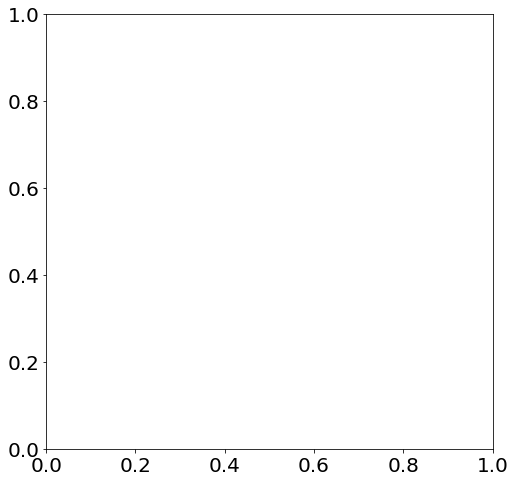

In [42]:
# train net with optimization method chose
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# error computation method
loss_func = torch.nn.MSELoss()
# divide dataset into train set and test set
train_macro, test_macro = train_test_split(df_processed_macro, train_size = 0.7)
train_micro, test_micro = train_test_split(df_processed_micro, train_size = 0.7)
train = pd.concat( [train_macro, train_micro], axis=0)
test = pd.concat( [test_macro, test_micro], axis=0)
train_input_tensor = torch.tensor(train.iloc[:,0:6].values)
train_output_tensor = torch.tensor(train.iloc[:,6:].values)
test_input_tensor = torch.tensor(test.iloc[:,0:6].values)
test_output_tensor = torch.tensor(test.iloc[:,6:].values)

#fig, ax = plt.subplots()
fig1, ax1 = plt.subplots(figsize=(8,8))
fig2, ax2 = plt.subplots(figsize=(8,8))
ax1.set_xlabel('epoch', fontsize=20)
ax1.set_ylabel('error', fontsize=20)
plt.ylim(0,1)
plt.tick_params(labelsize=20)


def frame_maker(train):
    global error
    error = pd.DataFrame(columns=['epoch','error'])
    # start training and :ilustrate the 
    for i in range(n_train):
        # input data to predict
        prediction = net(train_input_tensor.float())
    
        # error between expected data and predicted data, pay attention on consequence
        # first is predicted, second is real value
        loss = loss_func(prediction, train_output_tensor.float())

        # start optimize
        # set gradient as 0 before each optimization
        optimizer.zero_grad()
    
        # error pachpropogation
        loss.backward()
    
        # optimize parameters based on minimum loss
        optimizer.step()
        error = error.append(pd.DataFrame({'epoch':[i],'error':[loss.data.numpy()]}))
        
        if (i//10 == 0 or i//10 == 5) and i >= 10:
            #print(i)
            #print(loss.data.numpy())
            # plot the error in every epoch
            #ax1.scatter(i, loss.data.numpy(), s = 24, c = 'b')
            #ax1.scatter(error['error'], error['epoch'])
            #http://scipy-lectures.org/intro/numpy/auto_examples/plot_polyfit.html
            x = np.array(error['epoch'],dtype='float')
            y = np.array(error['error'],dtype='float')
            p = np.poly1d(np.polyfit(x, y, 15))
            t = np.linspace(0, 50, 50)
            ax1.plot(x, y, 'o',t, p(t), '-')
            #ax1.set_yscale('log')
            ax1.set_ylim(0.001,1)
            #ax1.plot(i, loss.data.numpy(), c='r')
            #plt.pause(0.1)


ani = animation.FuncAnimation(fig1, frame_maker, frames=list(range(40)))
html = ani.to_html5_video()
plt.close(fig1)
HTML(html)

In [39]:
HTML(html)

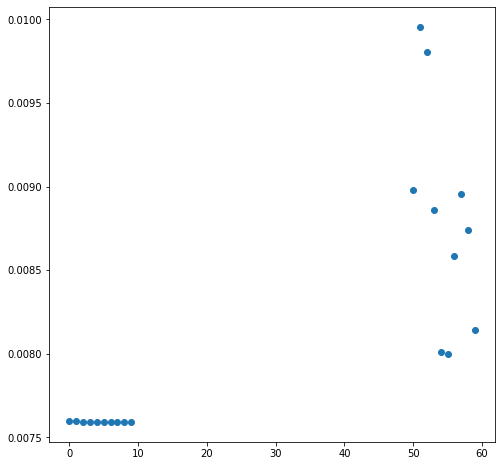

In [18]:
fig, ax=plt.subplots(figsize=(8,8))
ax.scatter(error['epoch'], error['error'])

In [32]:
error


,epoch,error
0,0,0.007516523
0,1,0.0075277197
0,2,0.007536488
0,3,0.0075357524
0,4,0.0075244163
...,...,...
0,295,0.0074250028
0,296,0.007424057
0,297,0.0074203894
0,298,0.0074146204


In [ ]:
torch_tensor = torch.tensor(train.iloc[:,0:6].values)
torch_tensor

In [ ]:
train.iloc[:,0:6]

In [72]:
torch_tensor = torch.tensor(train.iloc[:,6:].values)
torch_tensor

tensor([[0.0902, 0.0000],
        [0.0892, 0.0000],
        [0.0892, 0.0000],
        [0.0891, 0.0000],
        [0.0892, 0.0000],
        [0.0891, 0.0000],
        [0.0878, 0.0000],
        [0.0902, 0.0000],
        [0.0830, 0.0000],
        [0.0892, 0.0000],
        [0.0875, 0.0000],
        [0.0892, 0.0000],
        [0.0888, 0.0000],
        [0.0875, 0.0000],
        [0.0830, 0.0000],
        [0.0979, 0.0000],
        [0.0891, 0.0000],
        [0.7317, 0.0000],
        [0.0875, 0.0000],
        [0.0858, 0.0000],
        [0.0874, 0.0000],
        [0.0892, 0.0000],
        [0.0893, 0.0000],
        [0.0891, 0.0000],
        [0.0892, 0.0000],
        [0.0888, 0.0000],
        [0.0875, 0.0000],
        [0.0858, 0.0000],
        [0.0892, 0.0000],
        [0.0892, 0.0000],
        [0.0892, 0.0000],
        [0.0893, 0.0000],
        [0.0973, 0.0000],
        [0.0859, 0.0000],
        [0.0971, 0.0000],
        [0.0896, 0.0000],
        [0.0807, 0.0000],
        [0.0888, 0.0000],
        [0.0

In [73]:
df_processed.iloc[:,6:8]

,critical strain,wavenumber
0,0.234182,0.977052
1,0.229731,0.979818
2,0.228355,0.980362
3,0.227286,0.980903
4,0.226697,0.981441
...,...,...
649,0.103407,0.953789
650,0.103517,0.955195
651,0.103551,0.955195
652,0.103568,0.955891


In [83]:
loss.data

tensor(nan)

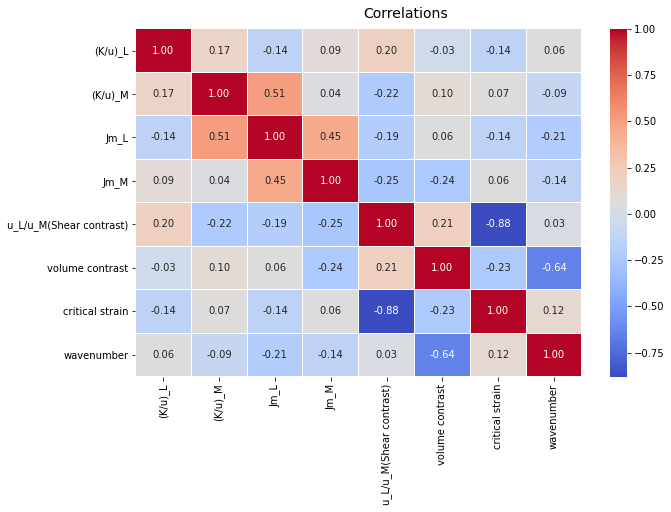

In [17]:
import seaborn as sns
# https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

#plot_data = df_processed.iloc[:,0:6]
plot_data = df_processed

f, ax = plt.subplots(figsize=(10, 6))
corr = plot_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlations', fontsize=14)

In [15]:

x = df_processed.iloc[:,0:6]
x

,(K/u)_L,(K/u)_M,Jm_L,Jm_M,u_L/u_M(Shear contrast),volume contrast
0,0.000000,0.000000,0.0,0.0,1.0,0.0
1,0.075257,0.075257,0.0,0.0,1.0,0.0
2,0.119280,0.119280,0.0,0.0,1.0,0.0
3,0.174743,0.174743,0.0,0.0,1.0,0.0
4,0.225772,0.225772,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
649,0.075257,1.000000,1.0,1.0,1.0,0.0
650,0.150515,1.000000,1.0,1.0,1.0,0.0
651,0.194538,1.000000,1.0,1.0,1.0,0.0
652,0.225772,1.000000,1.0,1.0,1.0,0.0


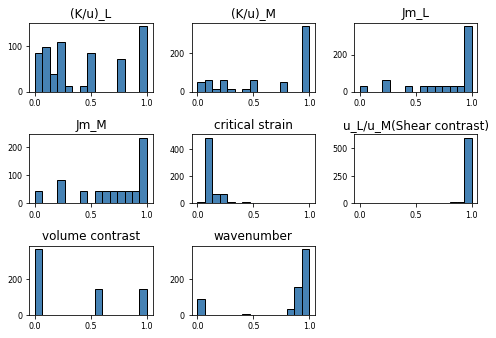

In [18]:
plot_data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

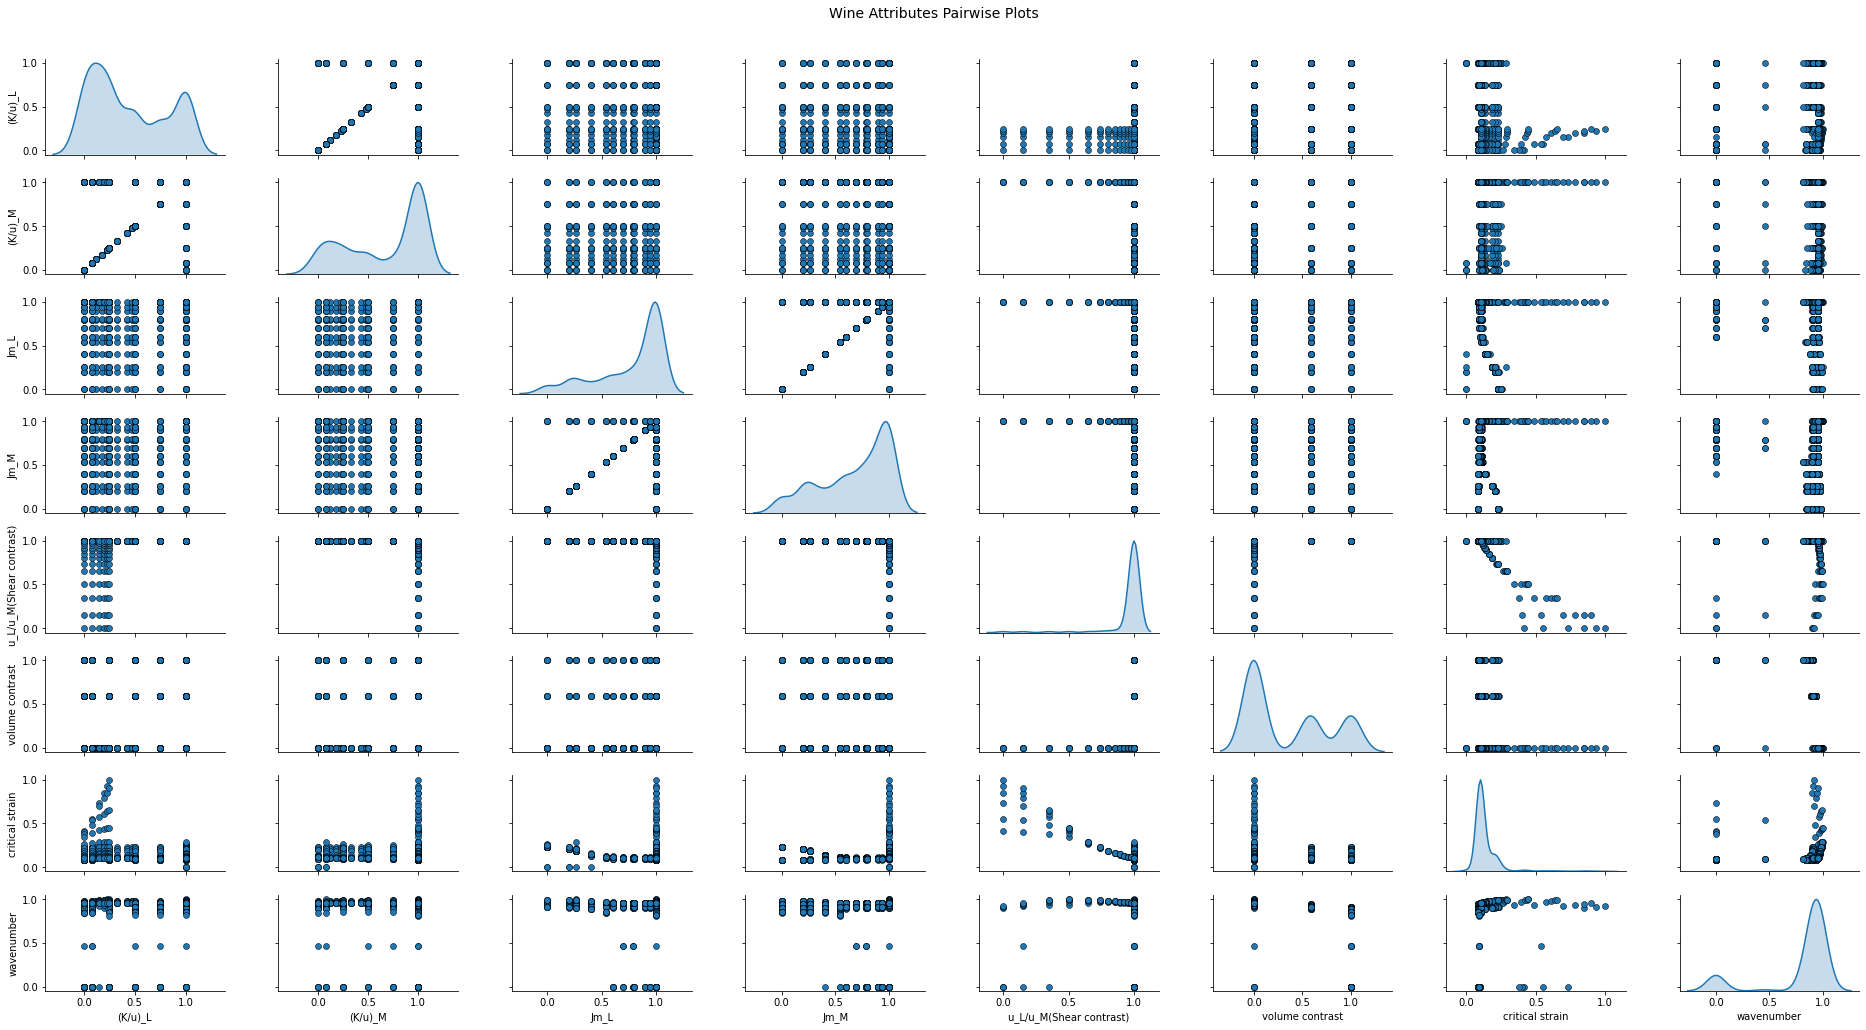

In [20]:
x = df_processed.iloc[:,0:6]

pp = sns.pairplot(df_processed, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)